In [8]:
import os
import pandas as pd
import scanpy as sc
import numpy as np
from collections import Counter

In [9]:
## set working directory
os.chdir("/home/niehu/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/")

In [10]:
## read infile
infile = pd.read_table("infile.txt", header=None, names = ["sampleName","url"] )

In [11]:
## show infile
infile

,sampleName,url
0,AlisonSimmons_2018Cell_uc_Mesenchyme,../01.preprocess/AlisonSimmons_2018Cell_uc_Mes...
1,AlisonSimmons_2019Nature_uc_epithelial,../01.preprocess/AlisonSimmons_2019Nature_uc_e...
2,AlisonSimmons_2020NatMed_uc_CD8Tcell,../01.preprocess/AlisonSimmons_2020NatMed_uc_C...
3,YuxiaZhang_Cell2019_ibd.discovery,../01.preprocess/YuxiaZhang_Cell2019_ibd.disco...
4,YuxiaZhang_Cell2019_ibd.validation,../01.preprocess/YuxiaZhang_Cell2019_ibd.valid...
5,Fina_M.Powrie_2021NatMed_Stromal,../01.preprocess/Fina_M.Powrie_2021NatMed_Stro...
6,John.T.Chang_2020SciImmunol_uc,../01.preprocess/John.T.Chang_2020SciImmunol_u...
7,EphraimKenigsberg_2019Cell_cd,../01.preprocess/EphraimKenigsberg_2019Cell_cd...
8,MacroColonna_2021NC_cd_Tcell,../01.preprocess/MacroColonna_2021NC_cd_Tcell/...
9,SarahA.Teichmann_Nature2021_intestinalDev_spac...,../01.preprocess/SarahA.Teichmann_Nature2021_i...


In [12]:
## read data
adatas = [ sc.read_h5ad(path) for path in infile.url ]

In [13]:
## show adatas
adatas

[AnnData object with n_obs × n_vars = 21773 × 36601
     obs: 'sampleName', 'study',
 AnnData object with n_obs × n_vars = 29299 × 36601
     obs: 'sampleName', 'study',
 AnnData object with n_obs × n_vars = 11270 × 36601
     obs: 'sampleName', 'study',
 AnnData object with n_obs × n_vars = 163817 × 36601
     obs: 'sampleName', 'study',
 AnnData object with n_obs × n_vars = 82293 × 36601
     obs: 'sampleName', 'study',
 AnnData object with n_obs × n_vars = 49673 × 36601
     obs: 'sampleName', 'study',
 AnnData object with n_obs × n_vars = 245104 × 36601
     obs: 'sampleName', 'study',
 AnnData object with n_obs × n_vars = 179771 × 33694
     obs: 'sampleName', 'study',
 AnnData object with n_obs × n_vars = 60110 × 33694
     obs: 'sampleName', 'study',
 AnnData object with n_obs × n_vars = 428469 × 33538
     obs: 'sampleName', 'study',
 AnnData object with n_obs × n_vars = 76592 × 33538
     obs: 'sampleName', 'study',
 AnnData object with n_obs × n_vars = 365492 × 21784
     obs

In [14]:
## combine adata
if len(adatas) == 1:
    adata = adatas[0]
else:
    ## combine datasets
    adata = adatas[0].concatenate(adatas[1:], index_unique = None)

In [15]:
## clean adatas
del adatas

In [16]:
## show adata
adata

AnnData object with n_obs × n_vars = 1713663 × 16105
    obs: 'sampleName', 'study', 'batch'

In [17]:
## show adata.obs
adata.obs

,sampleName,study,batch
GSM3140593_AAACCTGAGATACACA-1,GSM3140593,AlisonSimmons_2018Cell_uc_Mesenchyme,0
GSM3140593_AAACCTGCATGCCCGA-1,GSM3140593,AlisonSimmons_2018Cell_uc_Mesenchyme,0
GSM3140593_AAACCTGGTAAACGCG-1,GSM3140593,AlisonSimmons_2018Cell_uc_Mesenchyme,0
GSM3140593_AAACCTGGTCTCACCT-1,GSM3140593,AlisonSimmons_2018Cell_uc_Mesenchyme,0
GSM3140593_AAACCTGTCAGCCTAA-1,GSM3140593,AlisonSimmons_2018Cell_uc_Mesenchyme,0
...,...,...,...
N110.LPB.TTTGGTTAGGATGGTC,N110.LPB,AvivRegev_2019cell_uc,11
N110.LPB.TTTGGTTCACCTCGTT,N110.LPB,AvivRegev_2019cell_uc,11
N110.LPB.TTTGGTTTCGGAAACG,N110.LPB,AvivRegev_2019cell_uc,11
N110.LPB.TTTGTCAGTTGACGTT,N110.LPB,AvivRegev_2019cell_uc,11


In [18]:
## show adata.var
adata.var

""
FAM87B
LINC00115
FAM41C
SAMD11
NOC2L
...
MT-CYB
AC011043.1
AC011841.1
AL354822.1


In [19]:
## show adata
adata

AnnData object with n_obs × n_vars = 1713663 × 16105
    obs: 'sampleName', 'study', 'batch'

In [18]:
IG = pd.read_table("/home/niehu/niehu/database/00.genes/excluded/ig.txt", header = None)
IG = IG.loc[:,0].to_list()

TCR = pd.read_table("/home/niehu/niehu/database/00.genes/excluded/tr.txt", header = None)
TCR = TCR.loc[:,0].to_list()

CC = pd.read_table("/home/niehu/niehu/database/00.genes/excluded/regev_lab_cell_cycle_genes.txt", header=None)
CC = CC.loc[:,0].to_list()

In [19]:
## add meta data and calculate qc metrice
adata.var['mt'] = adata.var_names.str.startswith('MT-')
adata.var['rp'] = adata.var_names.str.match('^RP[LS]') | adata.var_names.str.match('^RP[0-9]+-')

mt = adata.var.index[ adata.var.mt].to_list()
rp = adata.var.index[ adata.var.rp].to_list()

In [20]:
exclude = IG + TCR + CC + mt + rp
adata.var['exclude'] = adata.var.index.isin(exclude)

In [20]:
## show adata
adata

AnnData object with n_obs × n_vars = 1713663 × 16105
    obs: 'sampleName', 'study', 'batch'

In [22]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['rp',"mt"], percent_top=None, log1p=False, inplace=True)

In [ ]:
## plot qc
## n_genes_by_counts => number of genes detected in each cell
## total_counts => number of UMIs detected in each cell
## pct_counts_mt => percentage of mitochondrial reads
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_rp'], jitter=0.4, multi_panel=True, size = 0)

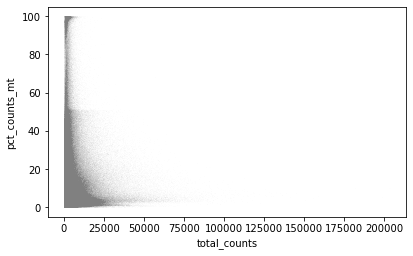

In [24]:
## plot qc
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

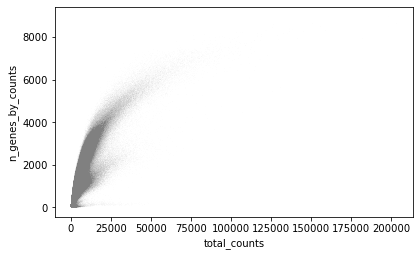

In [25]:
## plot qc
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [26]:
def doubleMAD(X, lower_fold = 3, upper_fold = 3):
    ## Detect outliers by doubleMAD
    ## calculate median
    X = pd.Series(X)
    M = np.median(X)

    ## lower limit
    X_left = X[X < M]
    abs_deviation = np.abs(M - X_left)
    med_abs_deviation = np.median(abs_deviation)
    lower_limit = M - lower_fold * med_abs_deviation
    
    ## upper limit
    X_right = X[ X >= M]
    abs_deviation = np.abs(M - X_right)
    med_abs_deviation = np.median(abs_deviation)
    upper_limit = M + upper_fold * med_abs_deviation
    
    ## return results
    out = (lower_limit, upper_limit)
    return(out)

In [27]:
## detect outliers
(lower_cut, upper_cut) = doubleMAD(adata.obs.n_genes_by_counts, lower_fold = 1.5, upper_fold = 10)
print(lower_cut, upper_cut)

399.0 6849.0


In [28]:
## show adata
adata

AnnData object with n_obs × n_vars = 1713663 × 16105
    obs: 'sampleName', 'study', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_rp', 'pct_counts_rp', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'rp', 'exclude', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [29]:
## Basic filtering
adata = adata[adata.obs.n_genes_by_counts < upper_cut, :]
adata = adata[adata.obs.n_genes_by_counts > lower_cut, :]
adata = adata[adata.obs.pct_counts_mt < 25, :]
sc.pp.filter_genes(adata, min_cells = 3)

Trying to set attribute `.var` of view, copying.


In [30]:
## show adata
adata

AnnData object with n_obs × n_vars = 1377694 × 16105
    obs: 'sampleName', 'study', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_rp', 'pct_counts_rp', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'rp', 'exclude', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

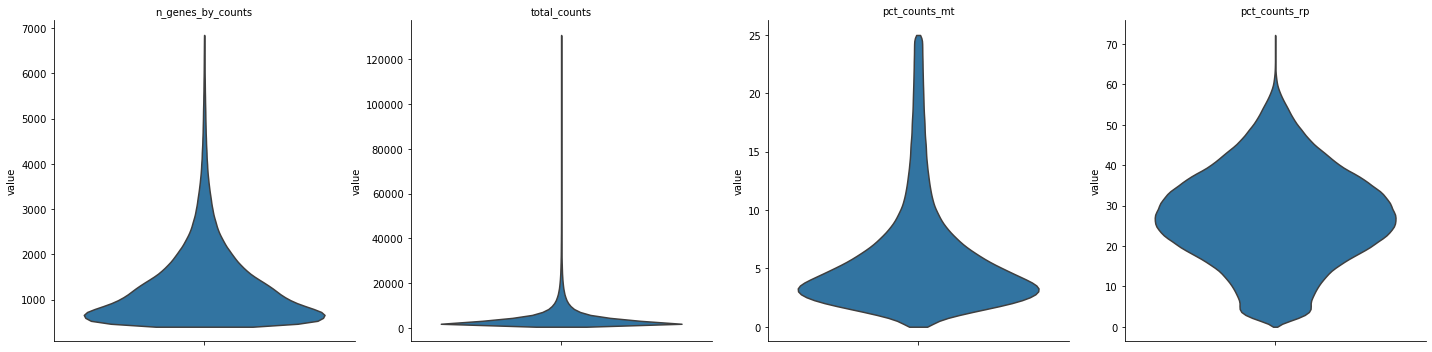

In [32]:
## plot qc
## n_genes_by_counts => number of genes detected in each cell
## total_counts => number of UMIs detected in each cell
## pct_counts_mt => percentage of mitochondrial reads
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_rp'], multi_panel=True, size = 0)

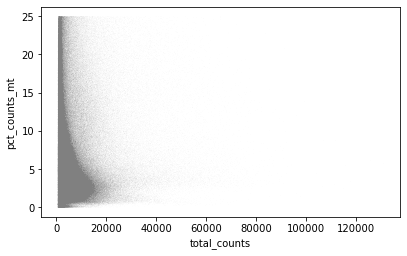

In [38]:
## plot qc
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

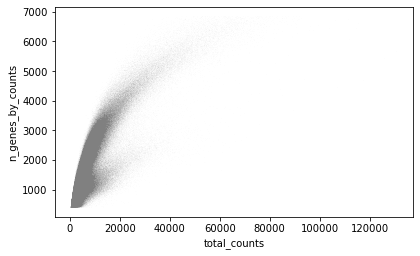

In [36]:
## plot qc
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [40]:
## filter by nCell perl batch
nCell_per_batch = adata.obs.sampleName.value_counts()
nCell_per_batch = nCell_per_batch[nCell_per_batch > 100]
nCell_per_batch

intestinalDev_3_6         15892
GSM4761143                12851
GSM3576418                12729
GSM3576410                12683
GSM3576430                12521
                          ...  
Human_colon_16S8000479      132
N7.EpiB                     124
N12.EpiA                    120
Human_colon_16S8002581      102
N12.EpiB                    102
Name: sampleName, Length: 440, dtype: int64

In [41]:
adata.write("ibd_20220111.raw.h5ad")

In [42]:
## filter datasets, nCell > 100
select = [ x in nCell_per_batch.index for x in adata.obs.sampleName]
adata = adata[ select, ]

In [43]:
## filter genes
adata = adata[:,np.logical_not(adata.var.exclude)]

In [44]:
## show adata
adata

View of AnnData object with n_obs × n_vars = 1376376 × 15706
    obs: 'sampleName', 'study', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_rp', 'pct_counts_rp', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'rp', 'exclude', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [45]:
## normalize and log scale
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/home/niehu/niehu/soft/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [46]:
## Identify highly-variable genes
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, batch_key = "sampleName")

/home/niehu/niehu/soft/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [47]:
#adata.raw = adata

In [48]:
## ## subset adata by hvg to reduce data size
adata = adata[:, adata.var.highly_variable]

In [49]:
## Scale each gene to unit variance. Clip values exceeding standard deviation 10
sc.pp.scale(adata, max_value=10)

/home/niehu/niehu/soft/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [50]:
## PCA
sc.tl.pca(adata, svd_solver='arpack')

In [51]:
## save data
adata.write("ibd_20220111.h5ad")

In [52]:
## done